In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab  as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import statsmodels
rcParams['figure.figsize'] = 20,12

In [2]:
df = pd.read_csv("AirPassengers.csv")

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
# The data contains a particular month and number of passengers travelling in that month. 
#In order to read the data as a time series, we have to pass special arguments to the 
#read_csv command:

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], 
                   index_col='Month',date_parser=dateparse)
print ('\n Parsed Data:')
print (data.head())




 Parsed Data:
            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


C:\Users\UTKARSH\AppData\Local\Temp\ipykernel_24620\186789325.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')


In [6]:
#Convert to time series
ts = data['#Passengers']
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

In [7]:
from datetime import datetime

<Axes: xlabel='Month'>

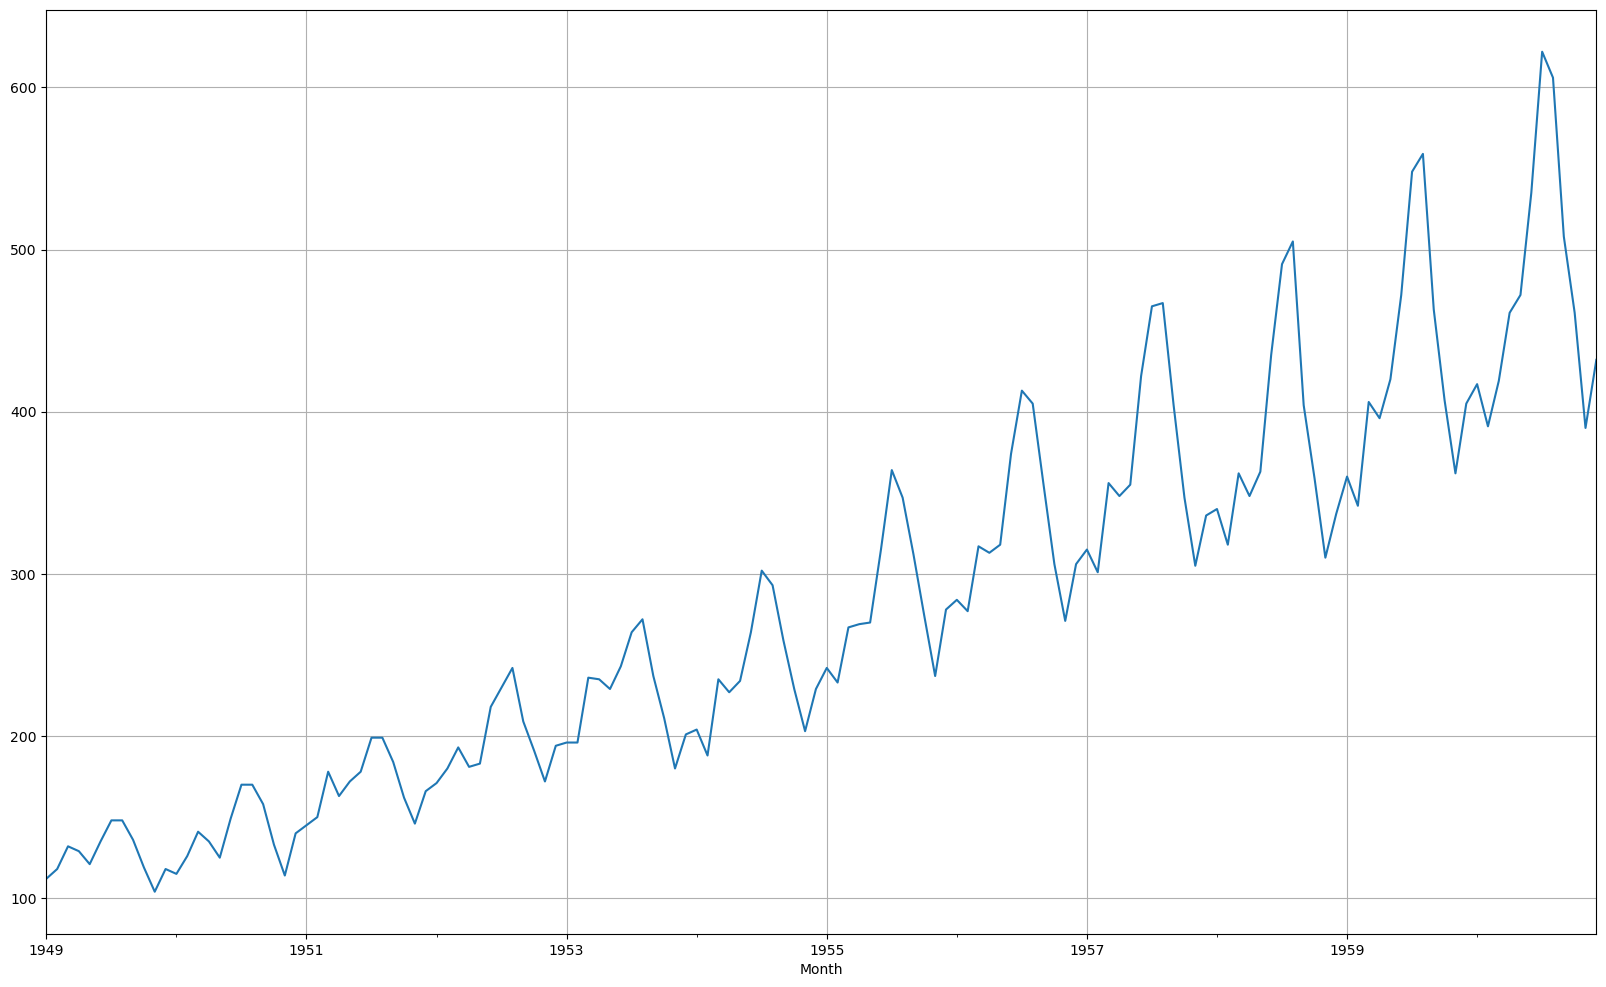

In [8]:
ts.plot(grid=True)

# Additive Decomposition

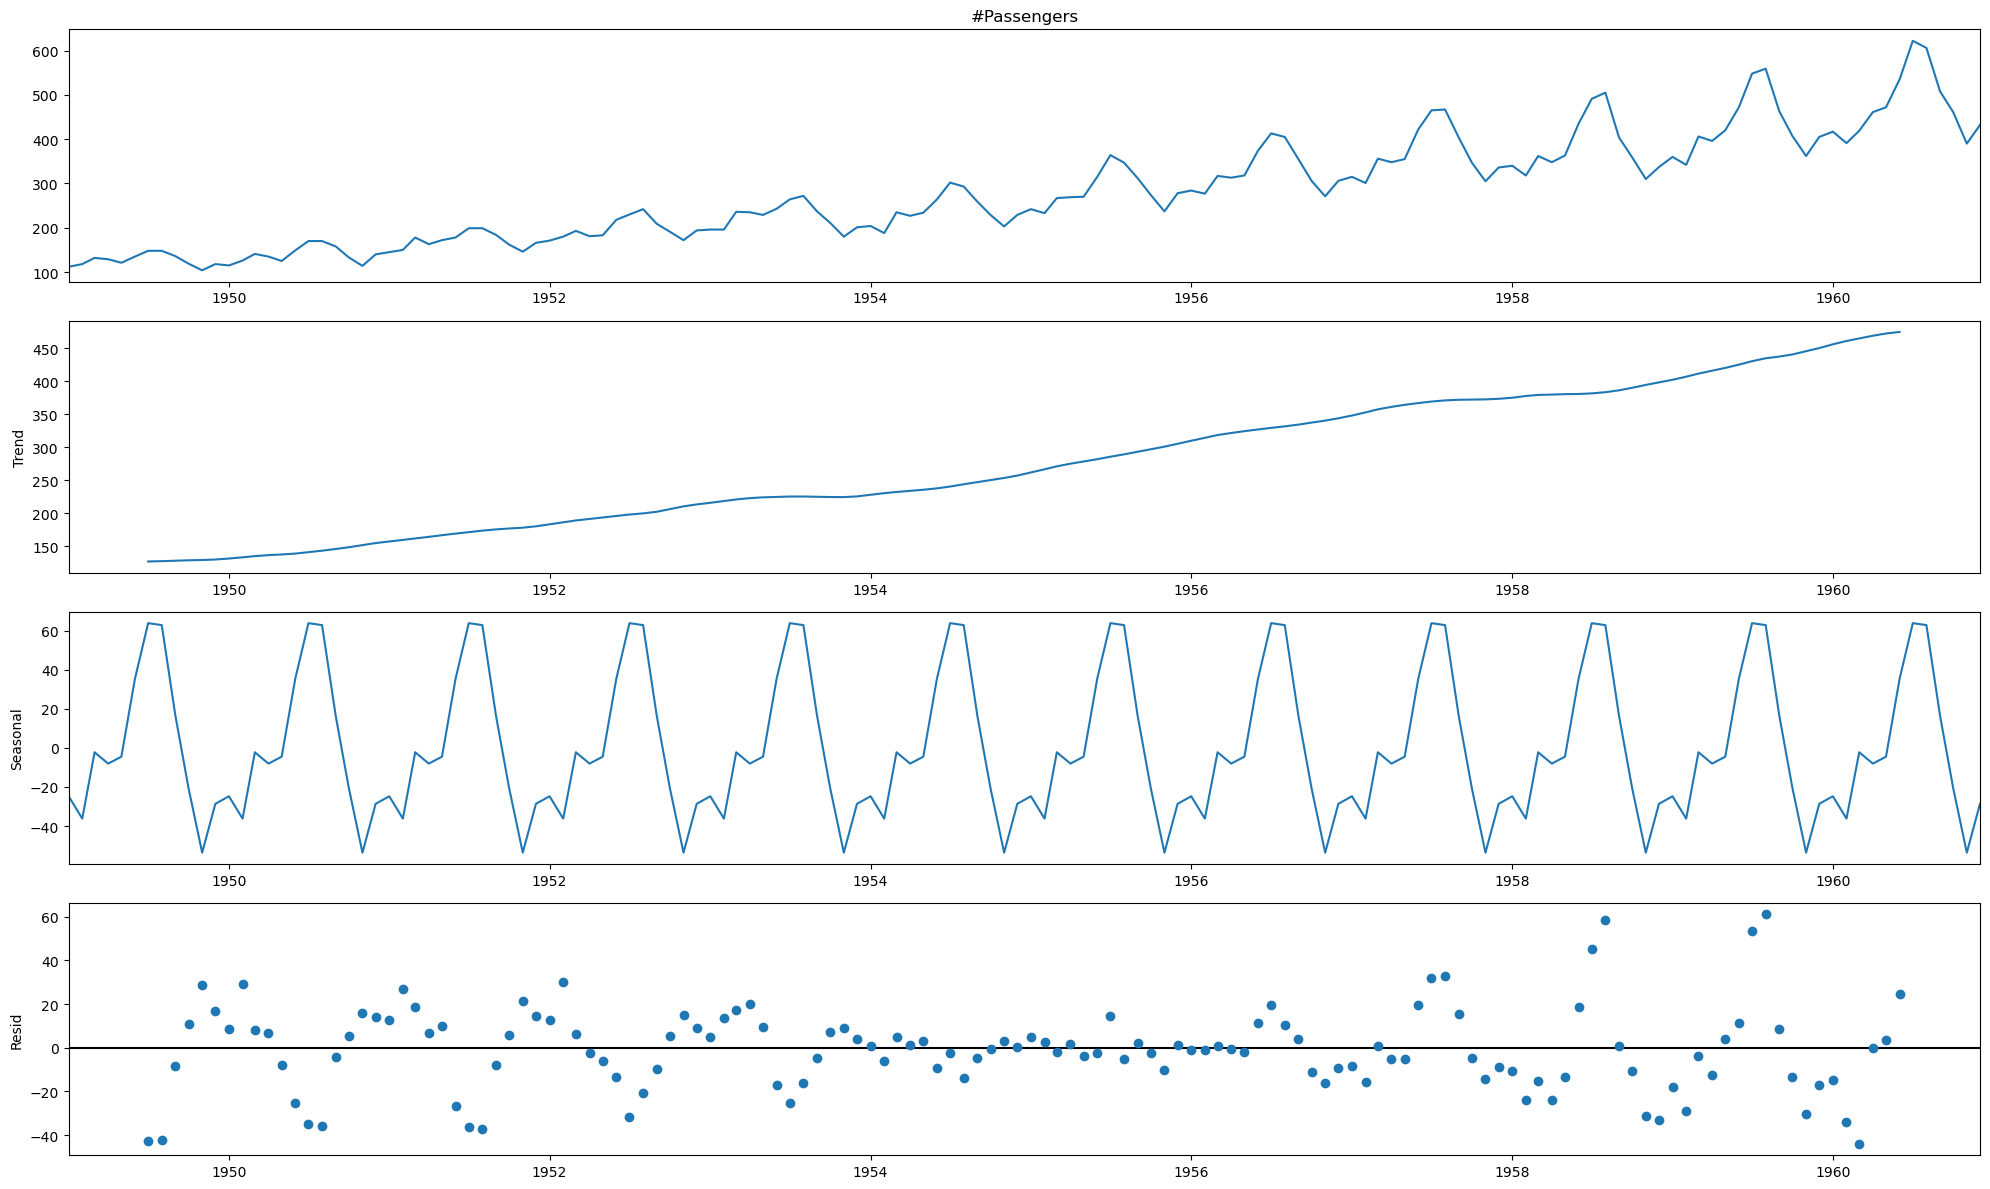

In [9]:
decomposition = seasonal_decompose(ts,model='additive')
decomposition.plot();

# Summary Statistics

In [10]:
from statsmodels.tsa.stattools import adfuller
tstest = adfuller(ts,regression='ct')
print('DF test statistic is %3.3f' %tstest[0])
print('DF test p-value is' ,tstest[1])
print('Number of lags used' ,tstest[2])

DF test statistic is -2.101
DF test p-value is 0.5456589343124534
Number of lags used 13


In [11]:
X_new = data.values
split = len(X_new)/2
X1, X2 = X_new[0:int(split)], X_new[int(split):]
mean1,mean2 = X1.mean(), X2.mean()
var1 , var2 = X1.var() , X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=182.902778, mean2=377.694444
variance1=2244.087770, variance2=7367.962191


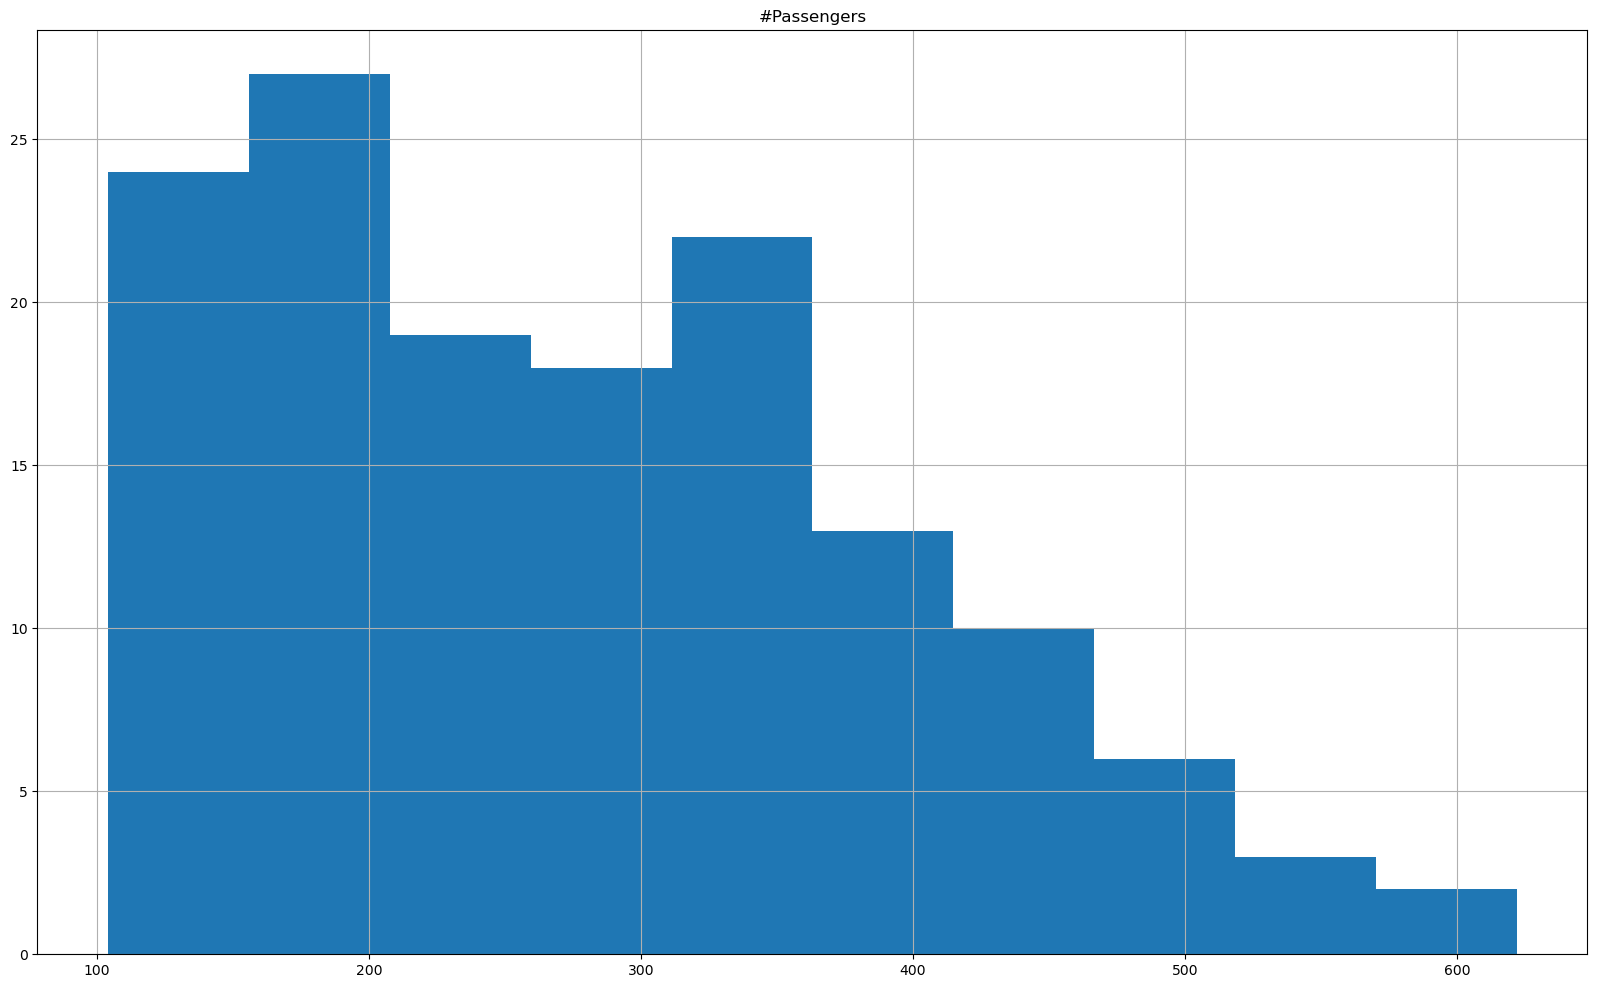

In [12]:
from matplotlib import pyplot
data.hist()
pyplot.show()

#### Values not looking like Gaussian, therefore mean & variance values are less meaningful
#### Reviewing the plot of the time series again, we can see that there is an obvious seasonality component, and it looks like the seasonality component is growing.

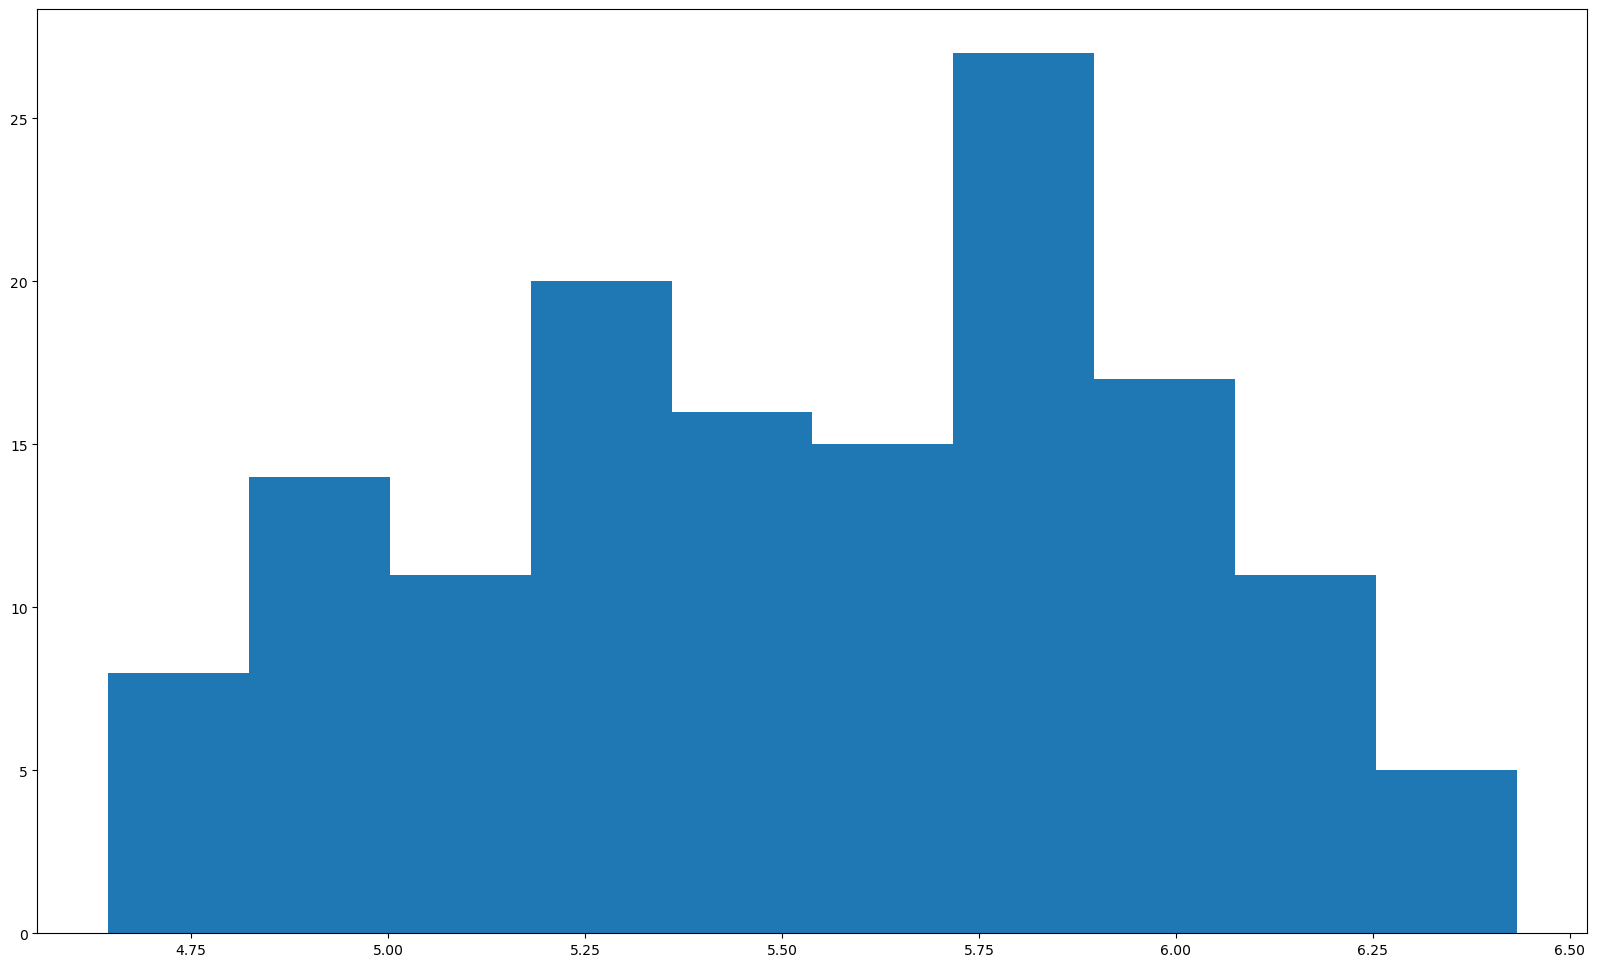

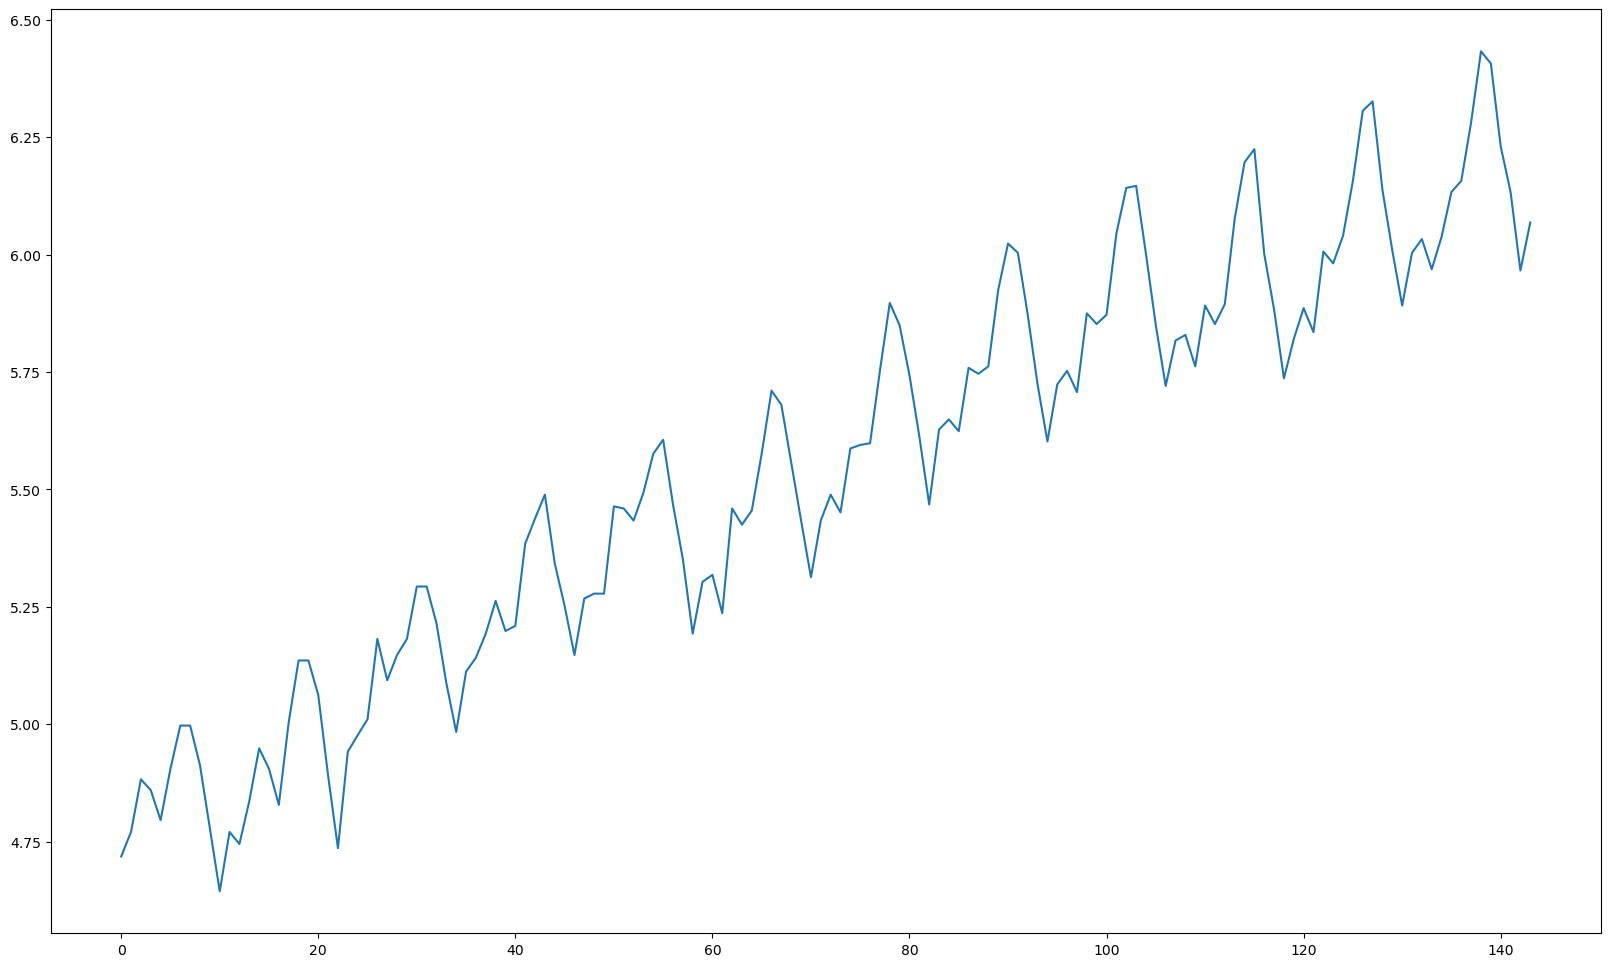

In [13]:
from numpy import log
X_log = log(data.values)
pyplot.hist(X_log)
pyplot.show()
pyplot.plot(X_log)
pyplot.show()

In [14]:

#We can now calculate the mean and standard deviation of the values of the log transformed dataset.
X_new_log = data.values
X_new_log = log(X_new_log)
split_log = len(X_new_log) / 2
X1_log, X2_log = X_new_log[0:int(split_log)], X_new_log[int(split_log):]
mean1_log, mean2_log = X1_log.mean(), X2_log.mean()
var1_log, var2_log = X1_log.var(), X2_log.var()
print('mean1=%f, mean2=%f' % (mean1_log, mean2_log))
print('variance1=%f, variance2=%f' % (var1_log, var2_log))


mean1=5.175146, mean2=5.909206
variance1=0.068375, variance2=0.049264


# Augmented Dickey Fuller Test

In [15]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

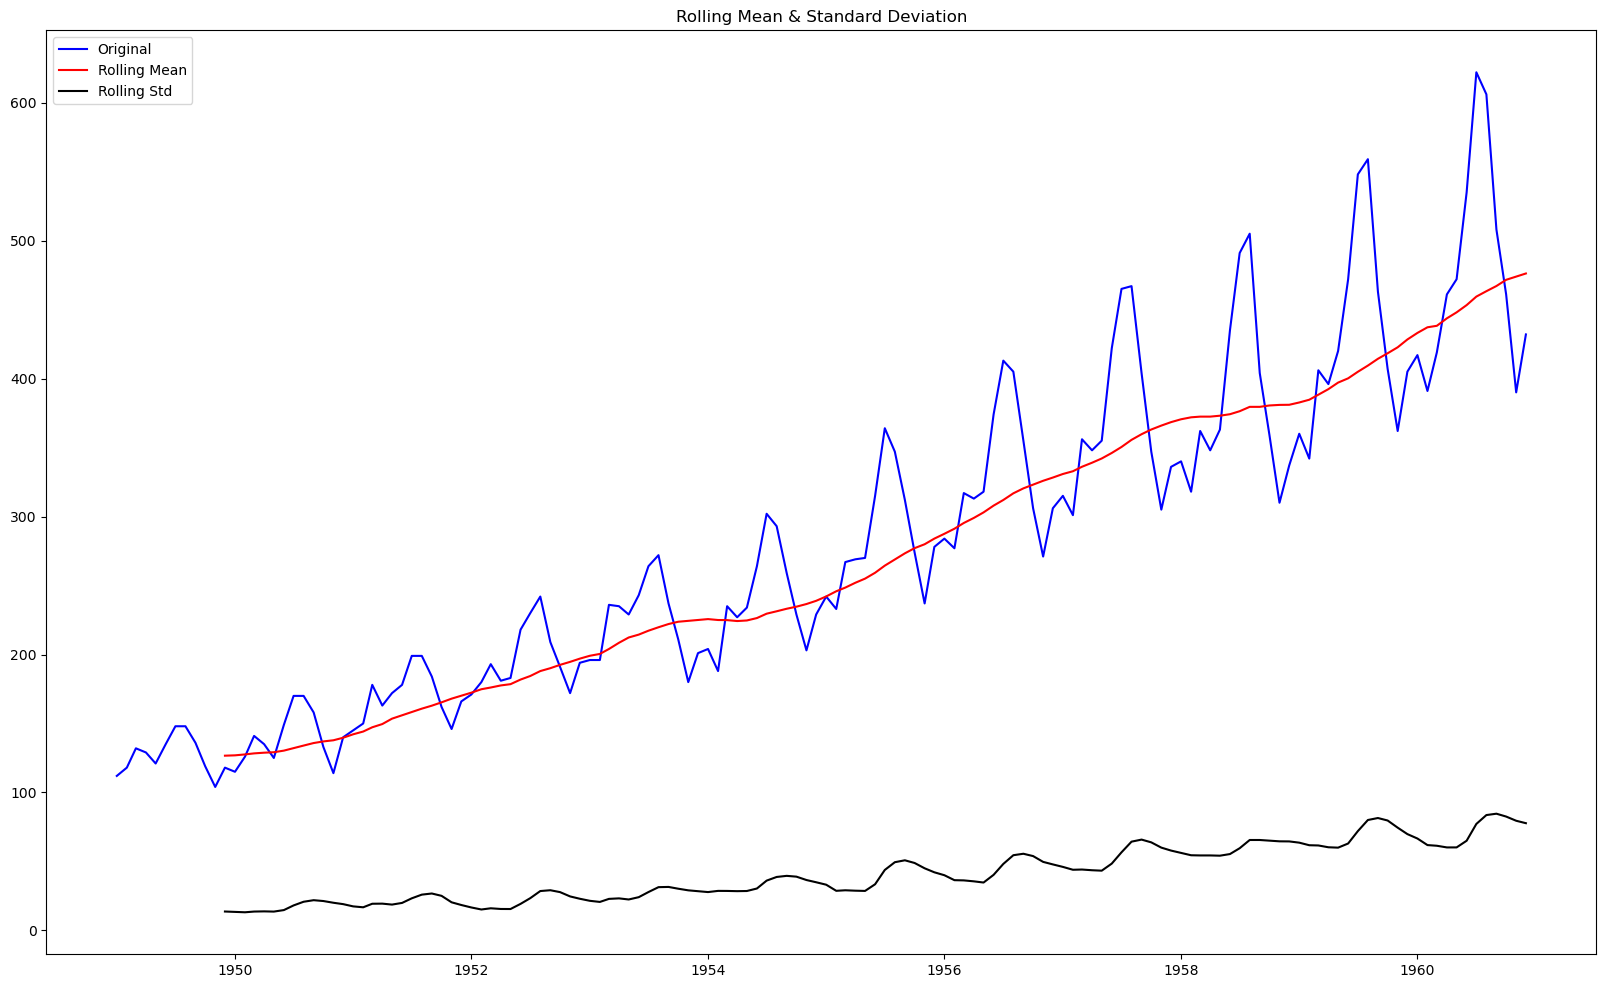

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [16]:
test_stationarity(ts)

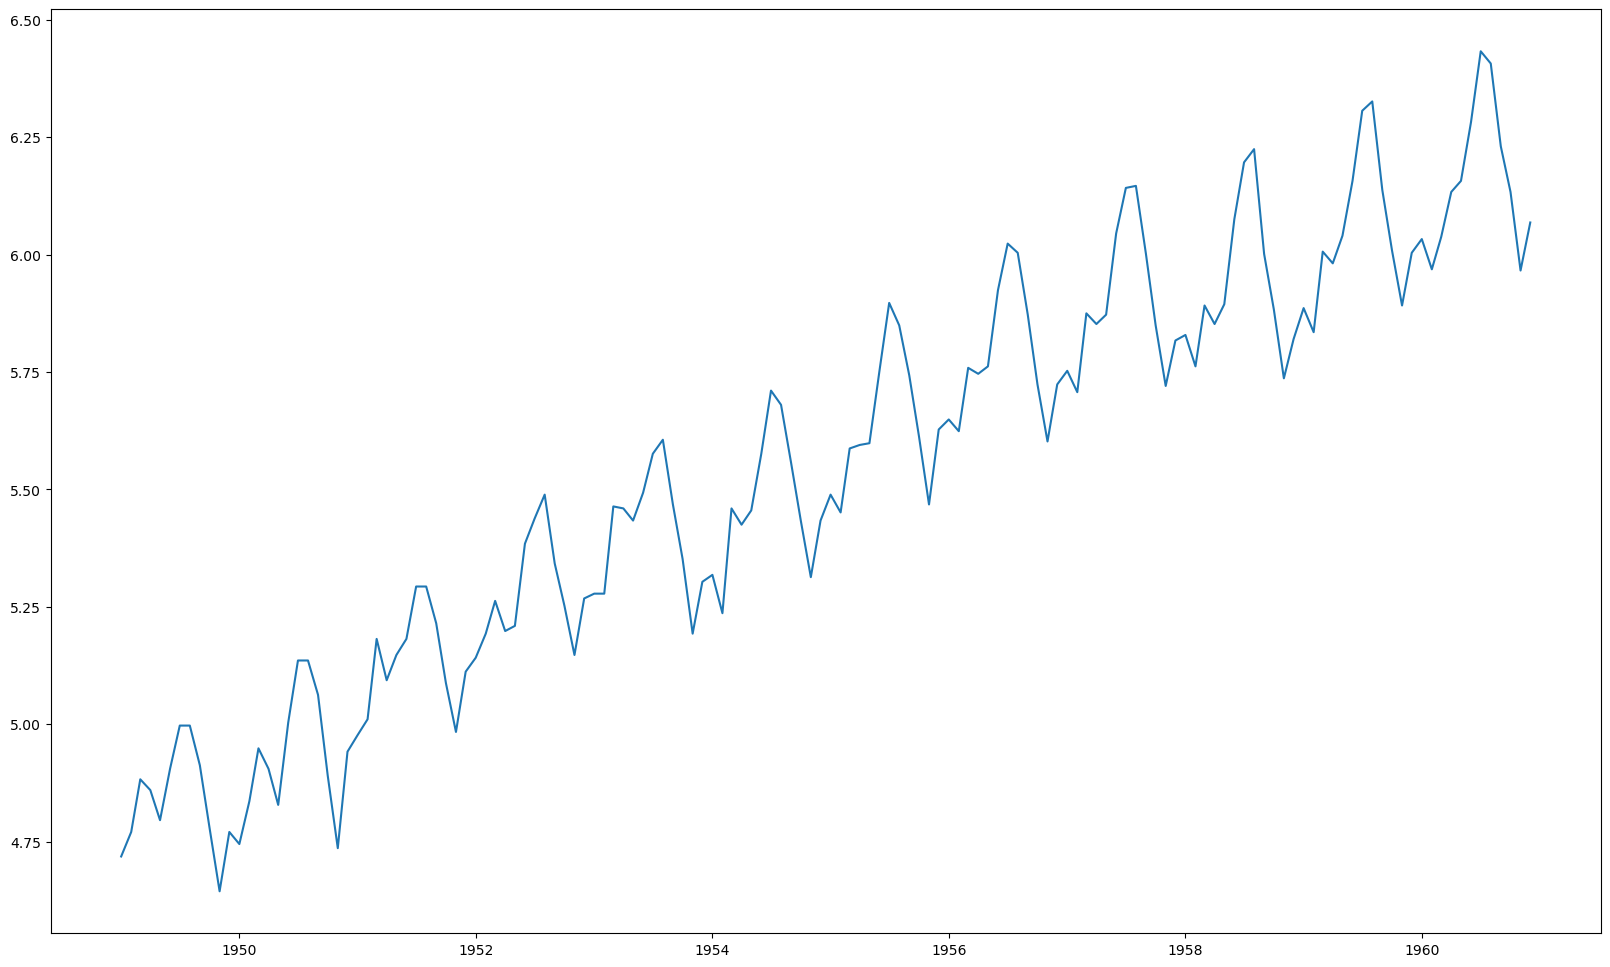

In [17]:
#MAKING TS STATIONARY

ts_log = np.log(ts)
plt.plot(ts_log)

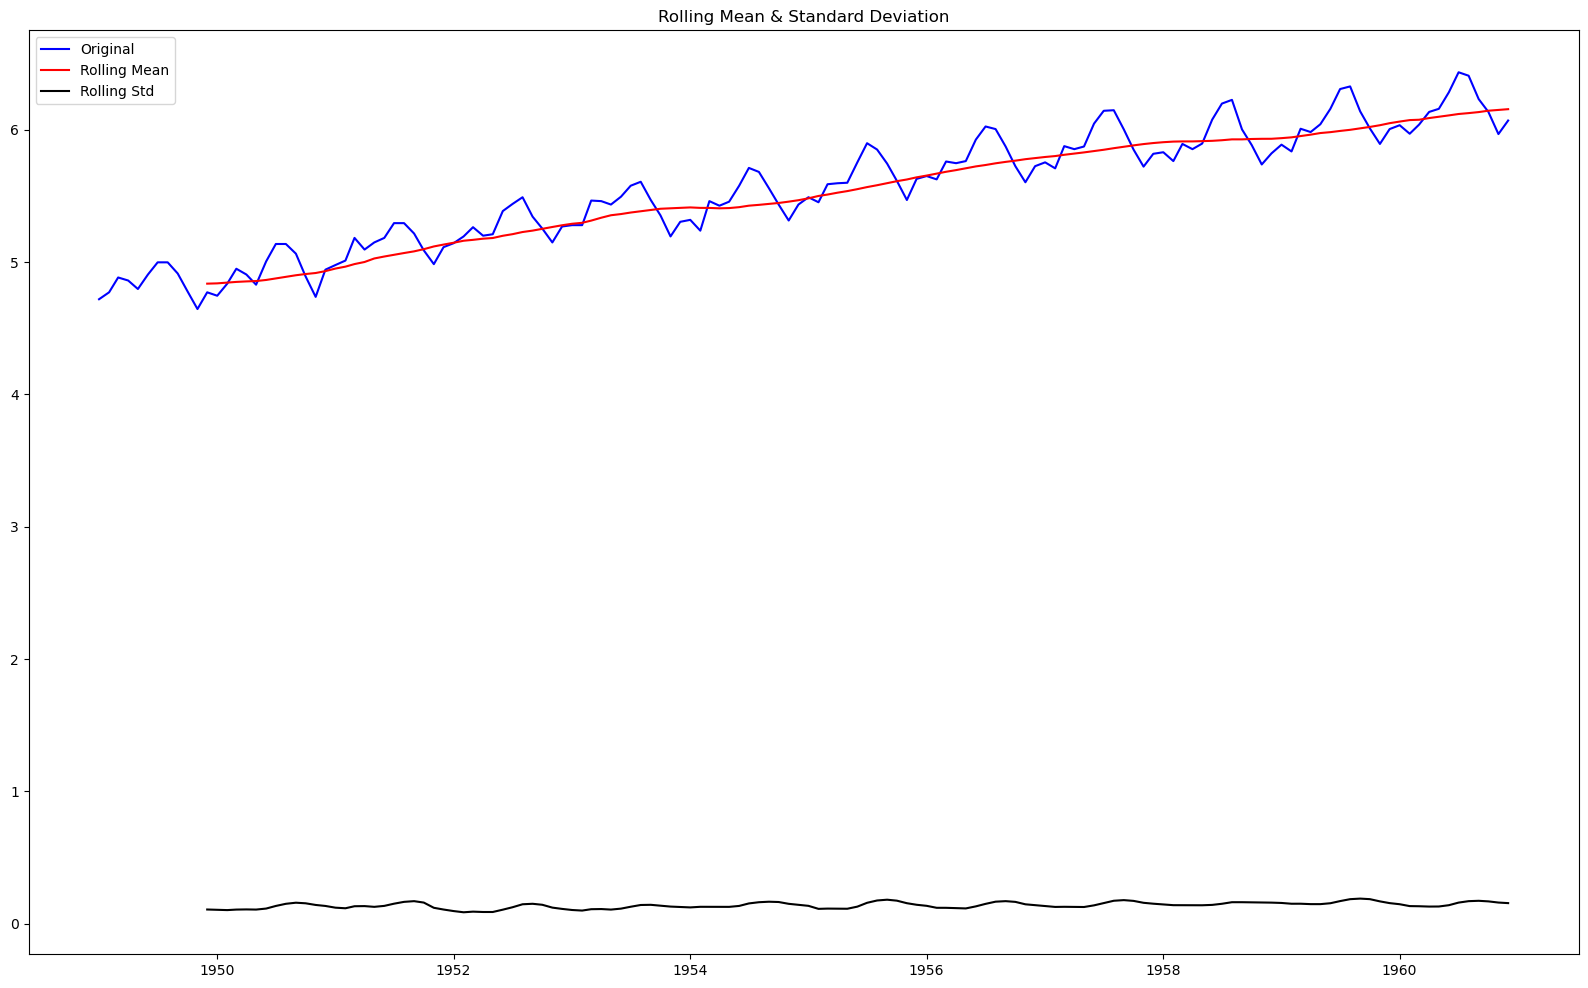

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [18]:
test_stationarity(ts_log)


In [19]:
#Smoothing
# Compute the simple moving average with a window size of 12
moving_avg = pd.Series(ts_log).rolling(window=12).mean()
print(moving_avg)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
                ...   
1960-08-01    6.124517
1960-09-01    6.132246
1960-10-01    6.142628
1960-11-01    6.148837
1960-12-01    6.154215
Name: #Passengers, Length: 144, dtype: float64


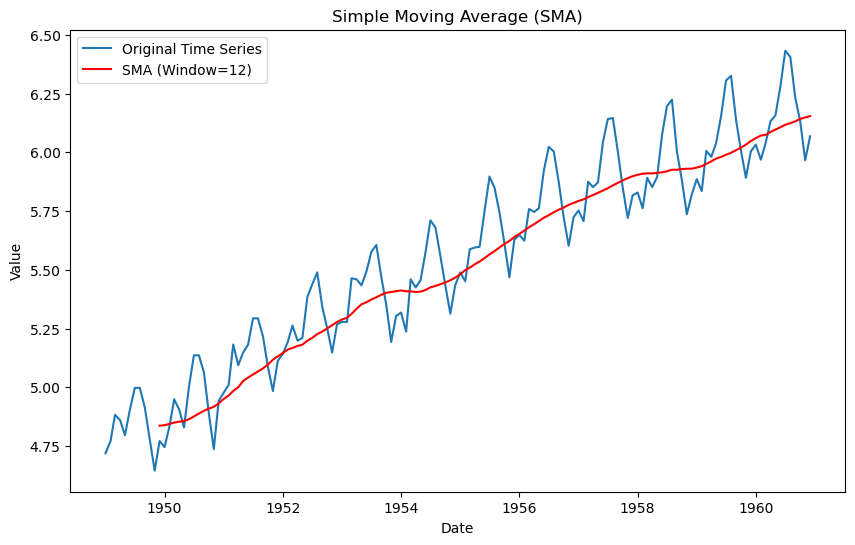

In [20]:
# Plot original time series and SMA
plt.figure(figsize=(10, 6))
plt.plot(ts_log, label='Original Time Series')
plt.plot(moving_avg, label='SMA (Window=12)', color='red')
plt.legend()
plt.title('Simple Moving Average (SMA)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [21]:

ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(5)

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
Name: #Passengers, dtype: float64

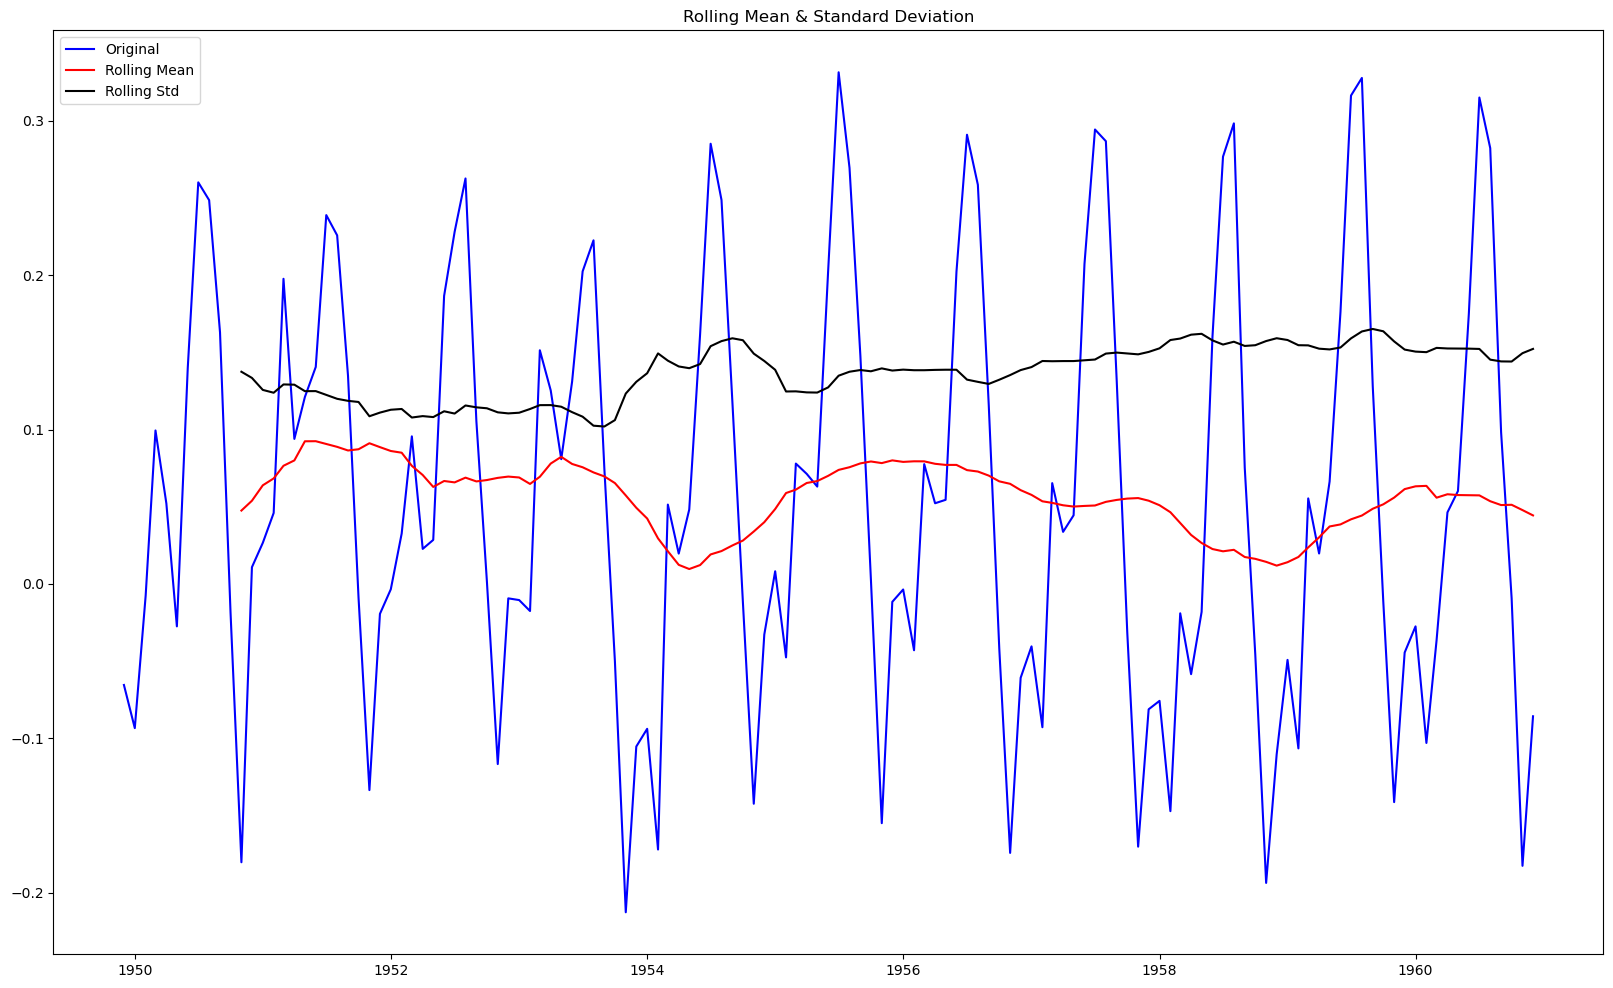

Results of Dickey-Fuller Test:


MissingDataError: exog contains inf or nans

In [22]:
#TEST STATIONARITY AGAIN
test_stationarity(ts_log_moving_avg_diff)

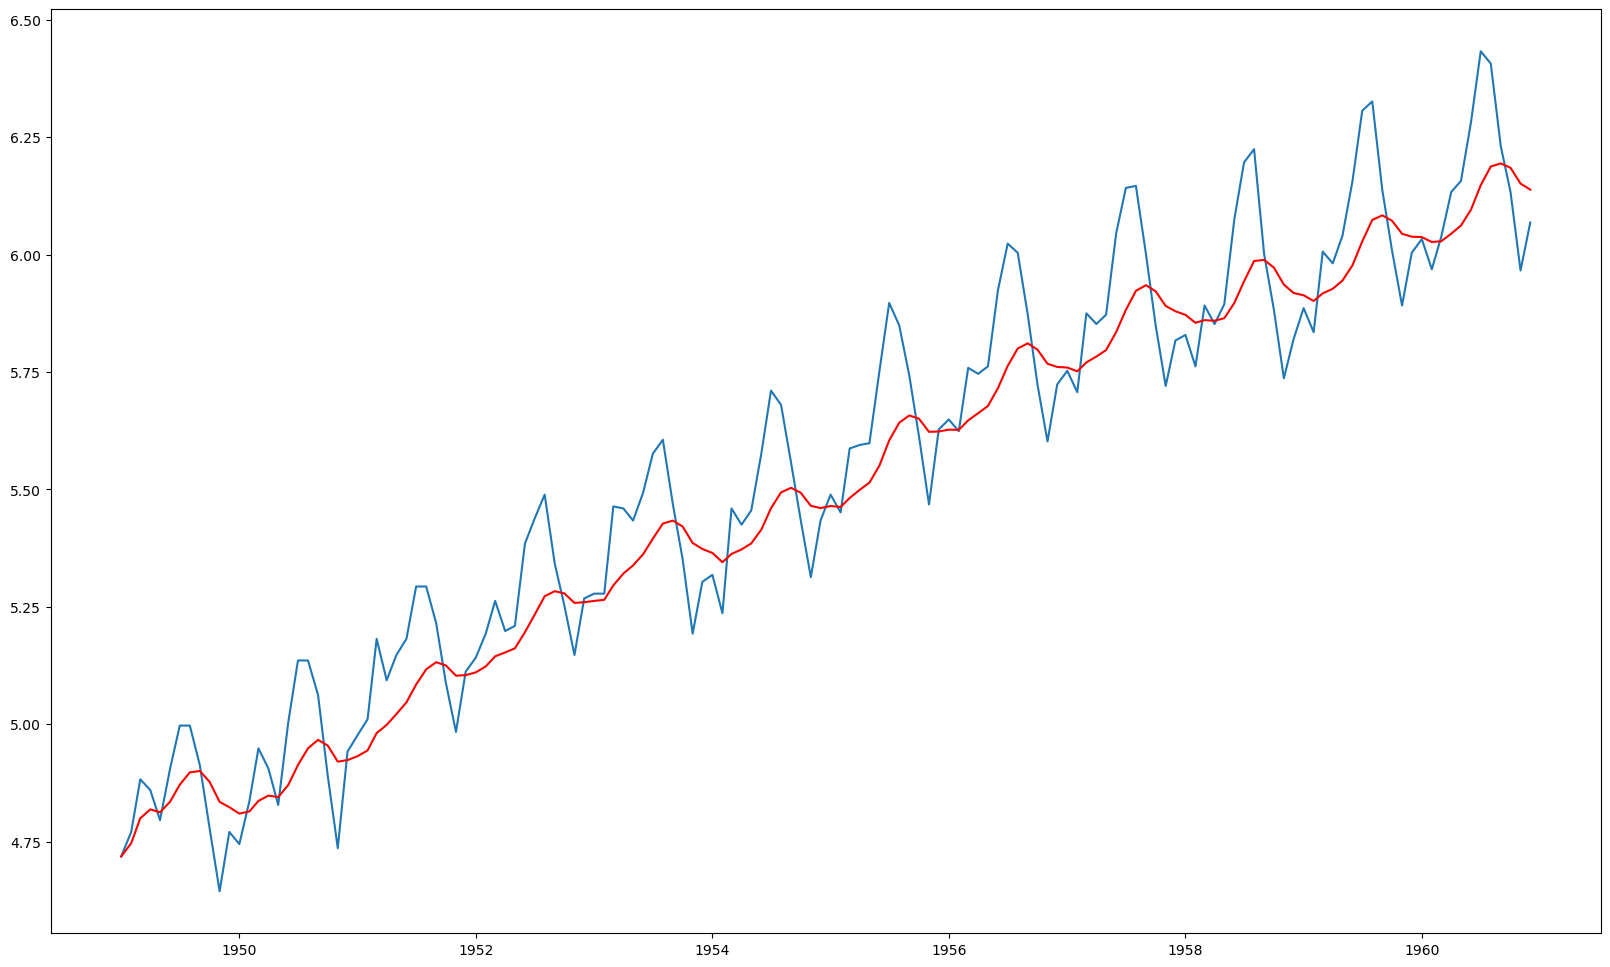

In [23]:
expwighted_avg = ts_log.ewm(span=12).mean() 
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

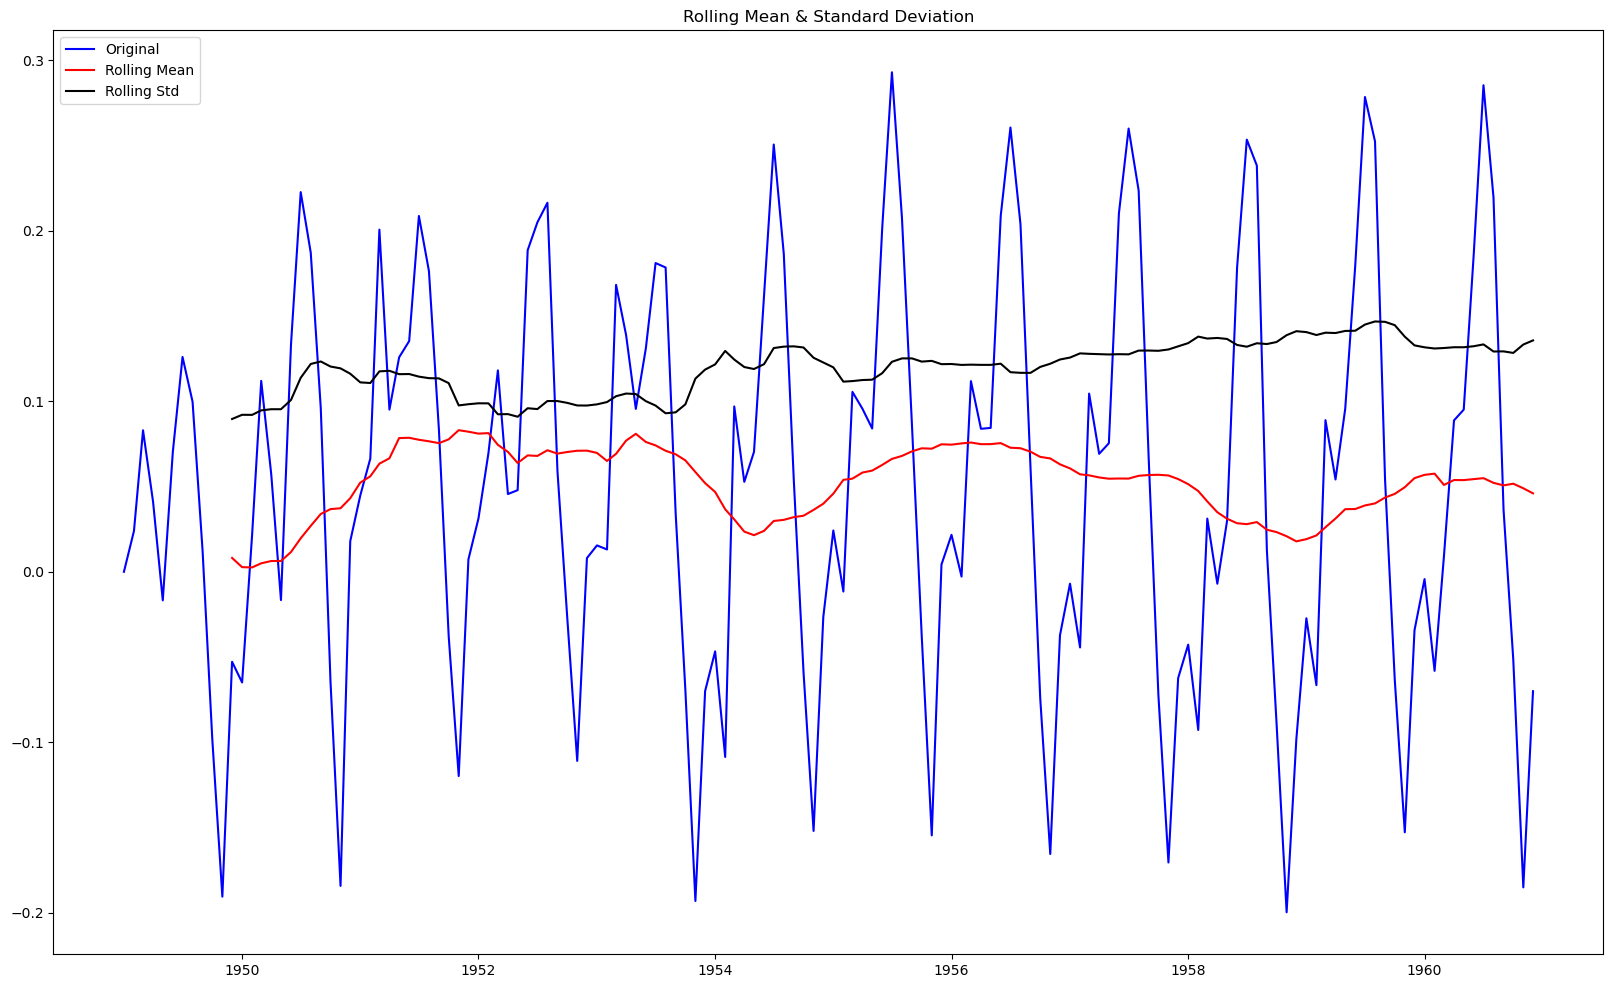

Results of Dickey-Fuller Test:
Test Statistic                  -3.310542
p-value                          0.014414
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [24]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

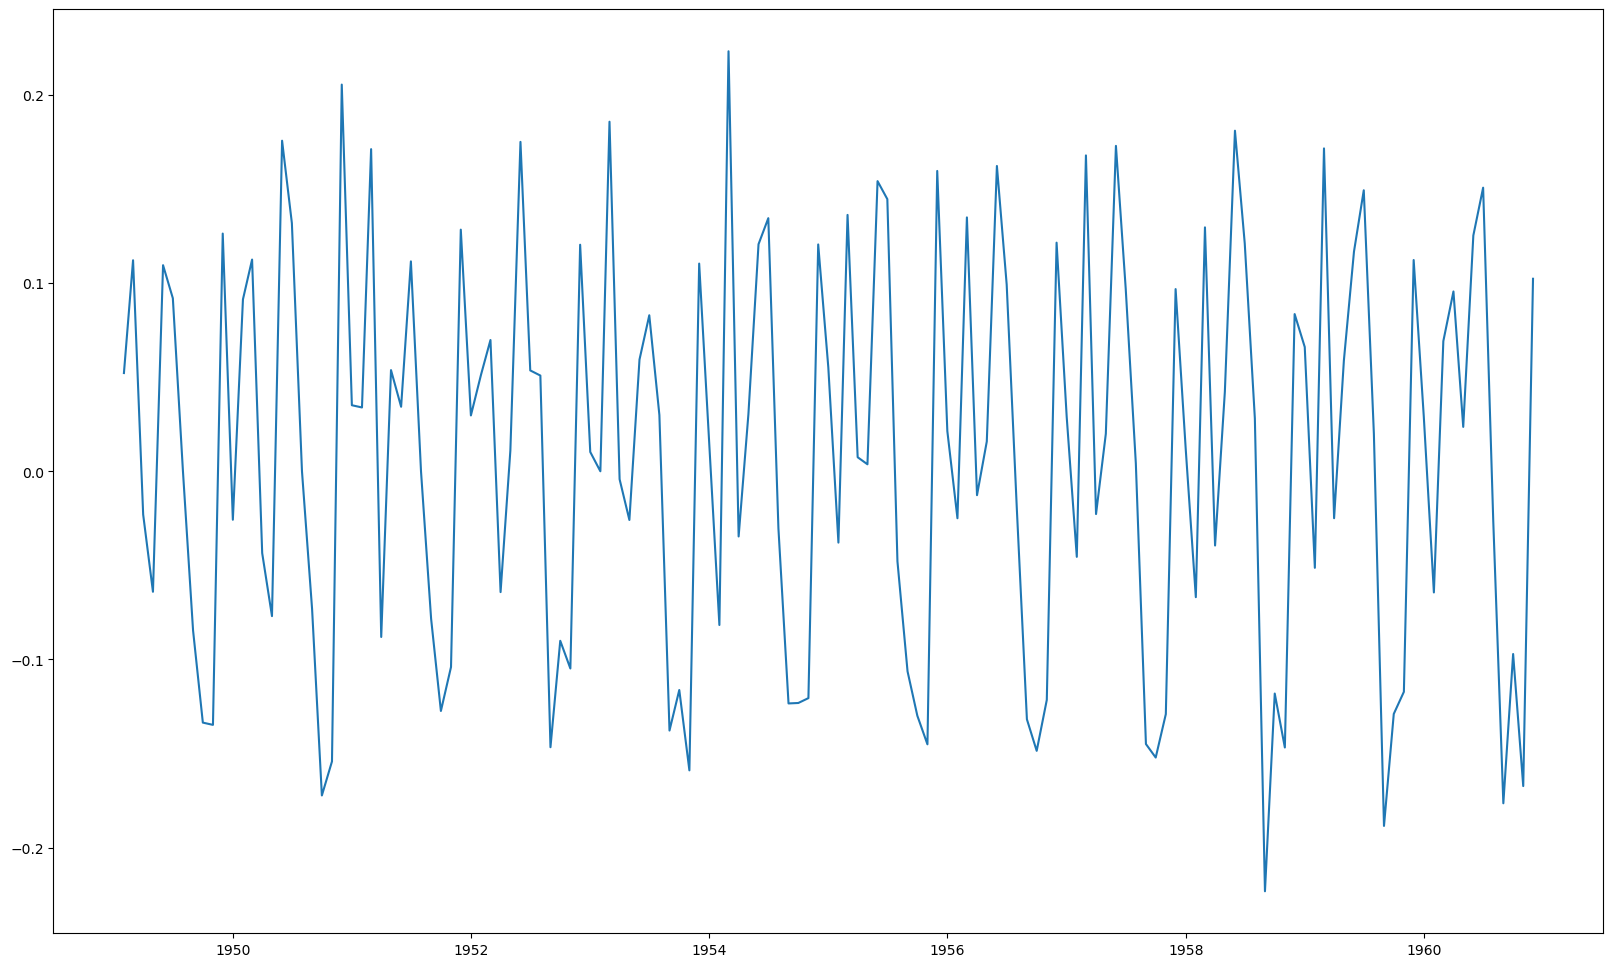

In [25]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

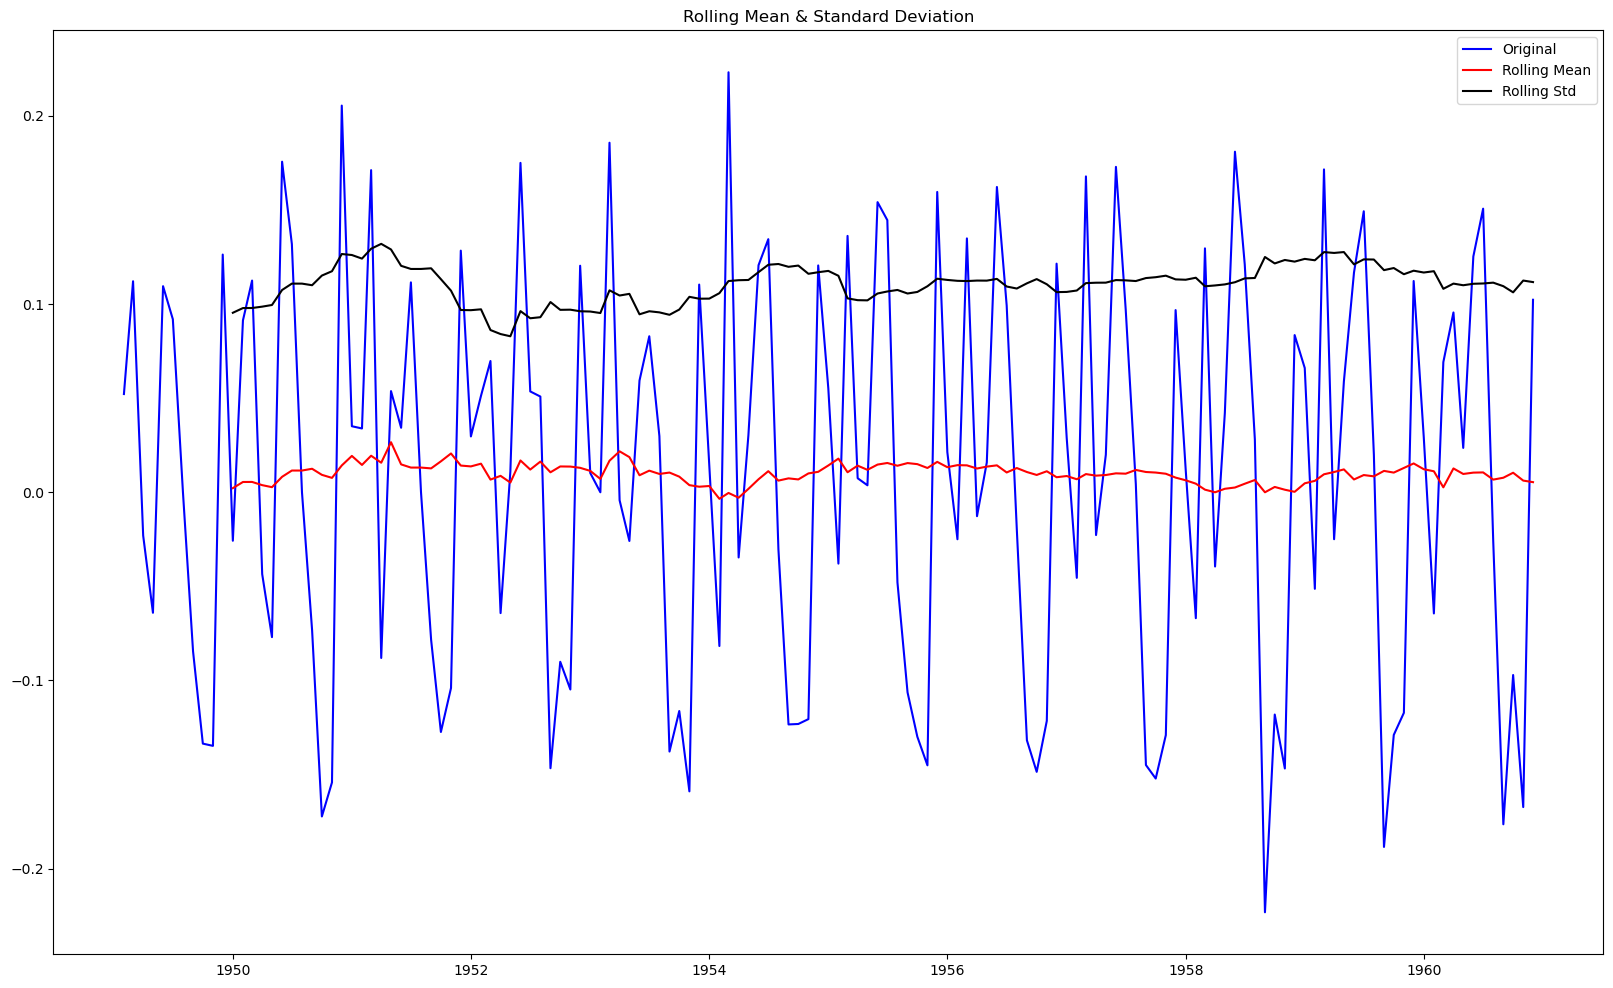

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [26]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [27]:

#DECOMPOSITION
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

In [28]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


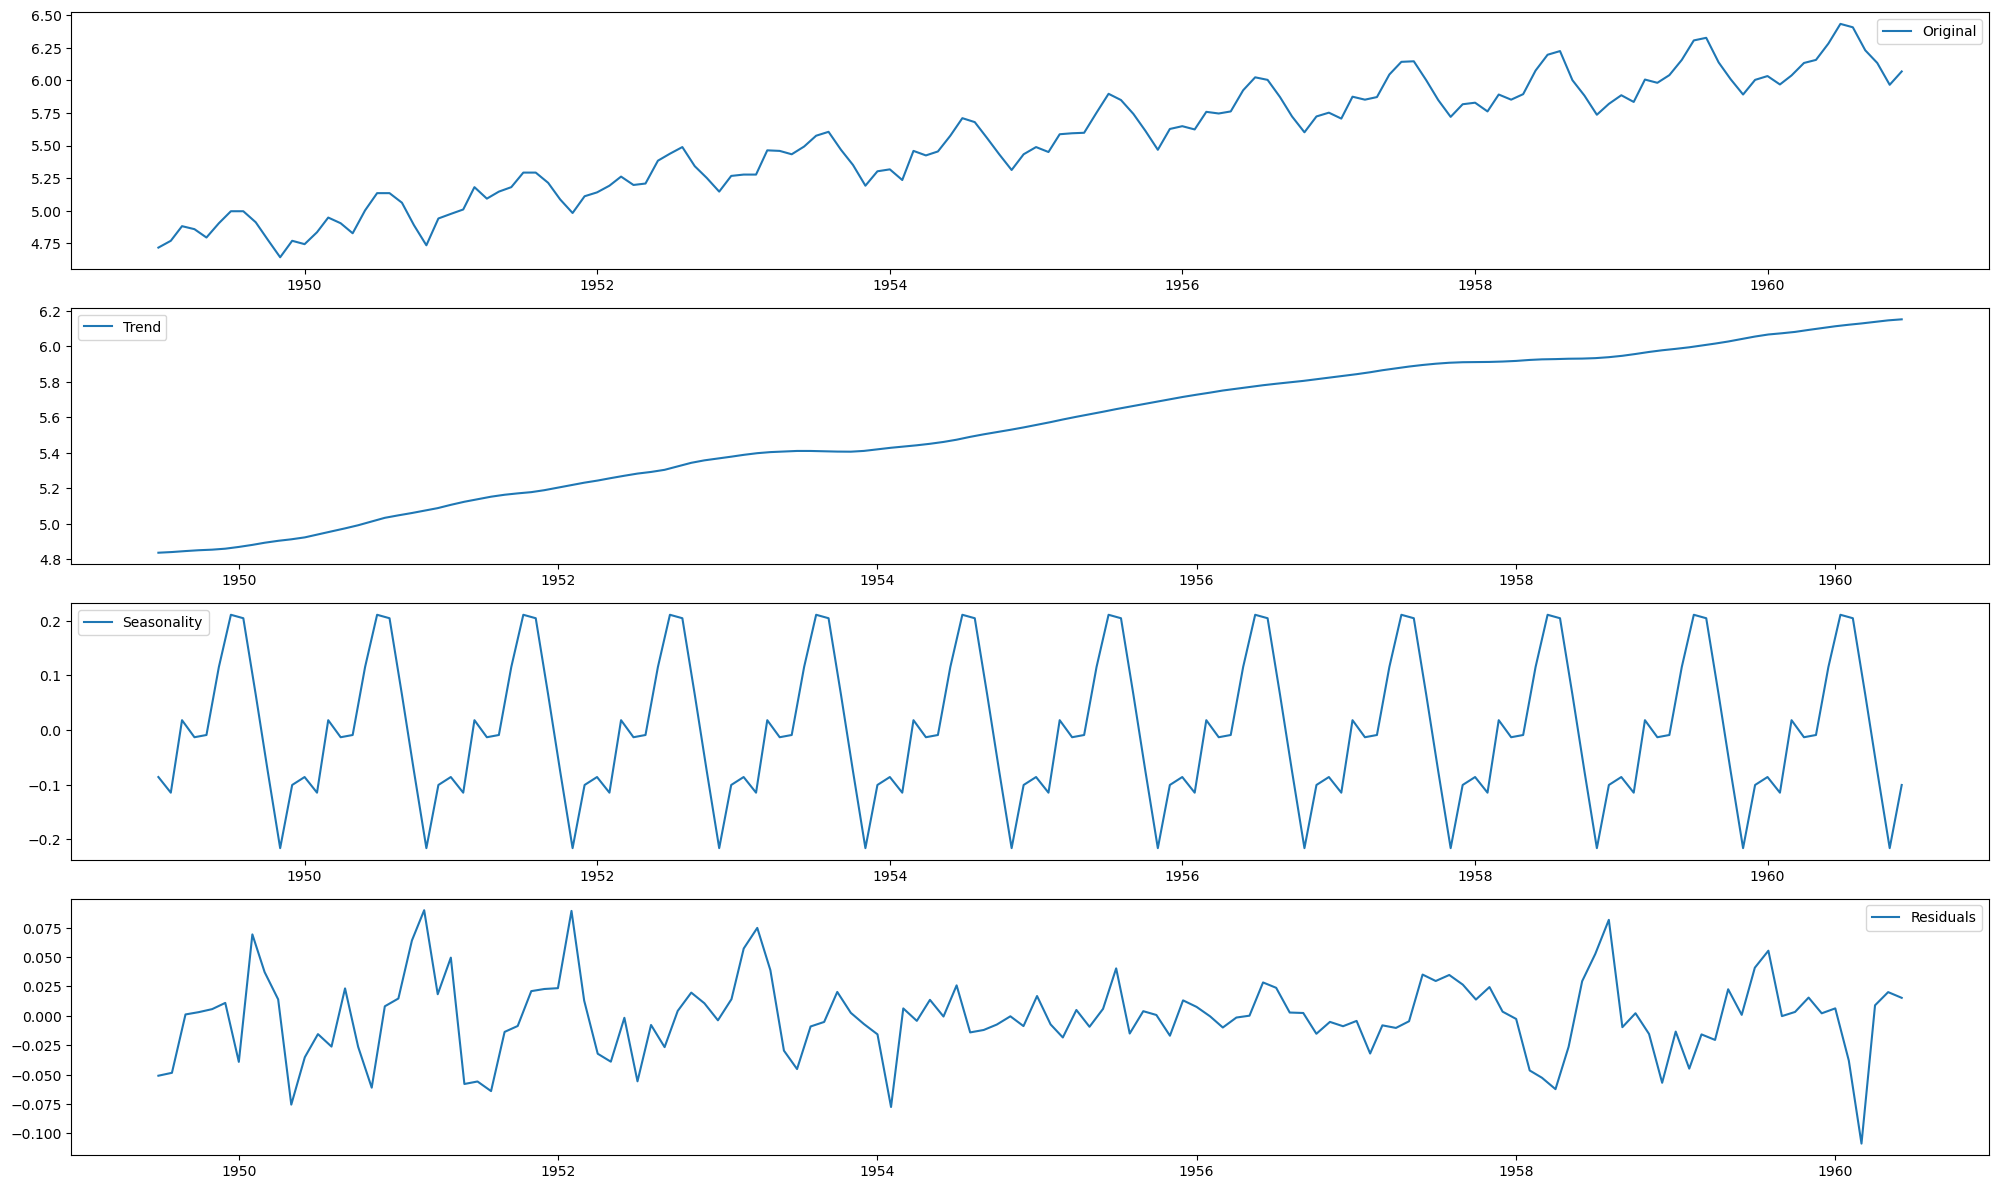

In [29]:
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


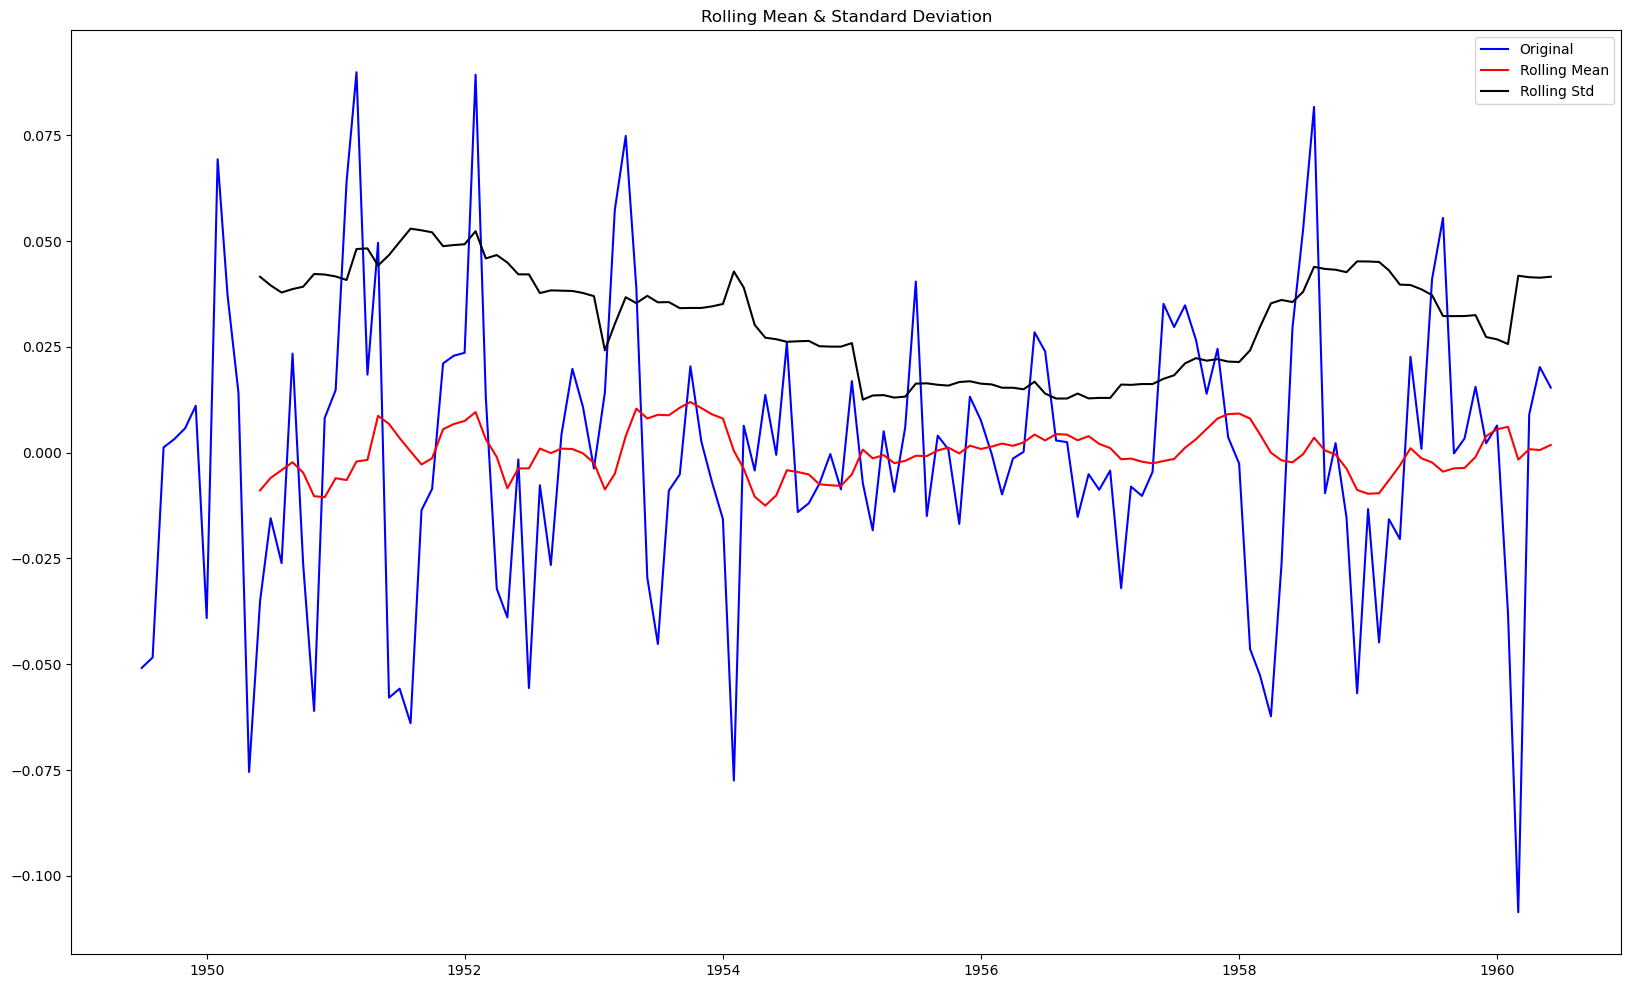

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [30]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [31]:
#FINAL FORECASTING
from statsmodels.tsa.arima_model import ARIMA

In [32]:
#ACF/PACF PLOTS

#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  


In [33]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

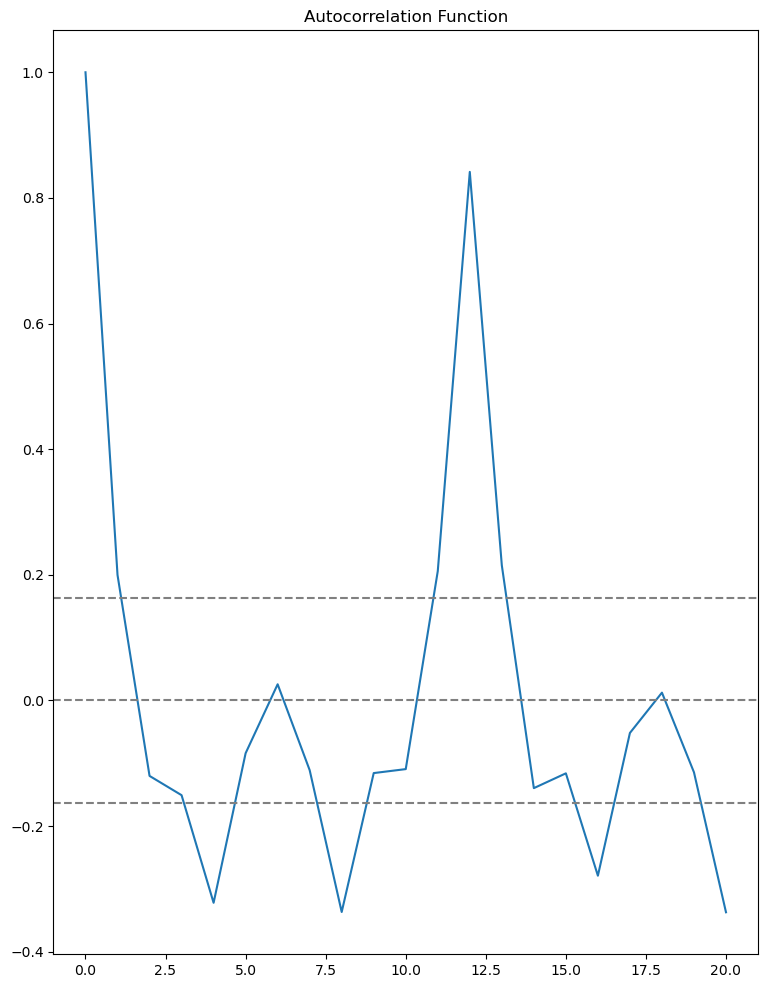

In [34]:

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

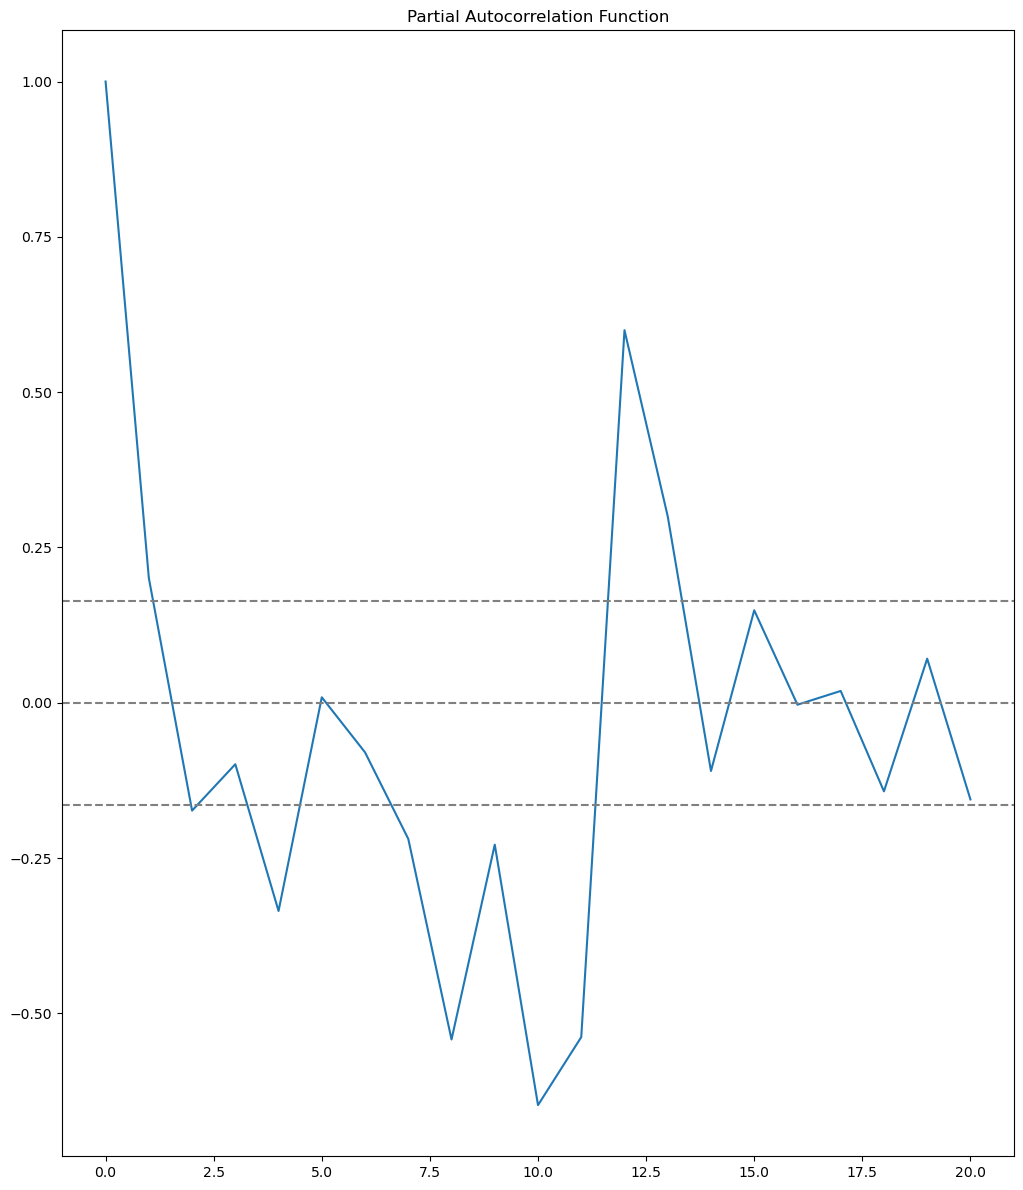

In [35]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [53]:
ts_values=ts_log.values

In [54]:

X = ts_values
size = int(len(X) * 0.667)
train, test = X[0:size], X[size:len(X)]

In [59]:
#MODEL BUILDING
#training will be 66%, test will be 33% as per our model
import warnings
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings("ignore")


In [60]:
history = [x for x in train]
predictions = list()
#test.reset_index()

# To identify the best combination of (p,d,q), please run the last part of this code (Grid Search)

In [61]:

for t in range(len(test)):
    try:
        model = ARIMA(history, order=(4,1,2))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    except (ValueError, LinAlgError):
        pass
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
rmse = mean_squared_error(test, predictions)**0.5
print('Test MSE: %.3f' % rmse)

predicted=5.768732, expected=5.752573
predicted=5.722156, expected=5.707110
predicted=5.731476, expected=5.874931
predicted=5.884590, expected=5.852202
predicted=5.815907, expected=5.872118
predicted=5.921640, expected=6.045005
predicted=6.023088, expected=6.142037
predicted=6.161477, expected=6.146329
predicted=6.176264, expected=6.001415
predicted=5.889869, expected=5.849325
predicted=5.794388, expected=5.720312
predicted=5.766371, expected=5.817111
predicted=5.861110, expected=5.828946
predicted=5.791134, expected=5.762051
predicted=5.794938, expected=5.891644
predicted=5.919766, expected=5.852202
predicted=5.806811, expected=5.894403
predicted=5.932975, expected=6.075346
predicted=6.066414, expected=6.196444
predicted=6.189644, expected=6.224558
predicted=6.259852, expected=6.001415
predicted=5.891090, expected=5.883322
predicted=5.858099, expected=5.736572
predicted=5.699366, expected=5.820083
predicted=5.928270, expected=5.886104
predicted=5.904780, expected=5.834811
predicted=5.

In [62]:
#CHECKING ERROR
from math import sqrt
rms = sqrt(mean_squared_error(test, predictions))

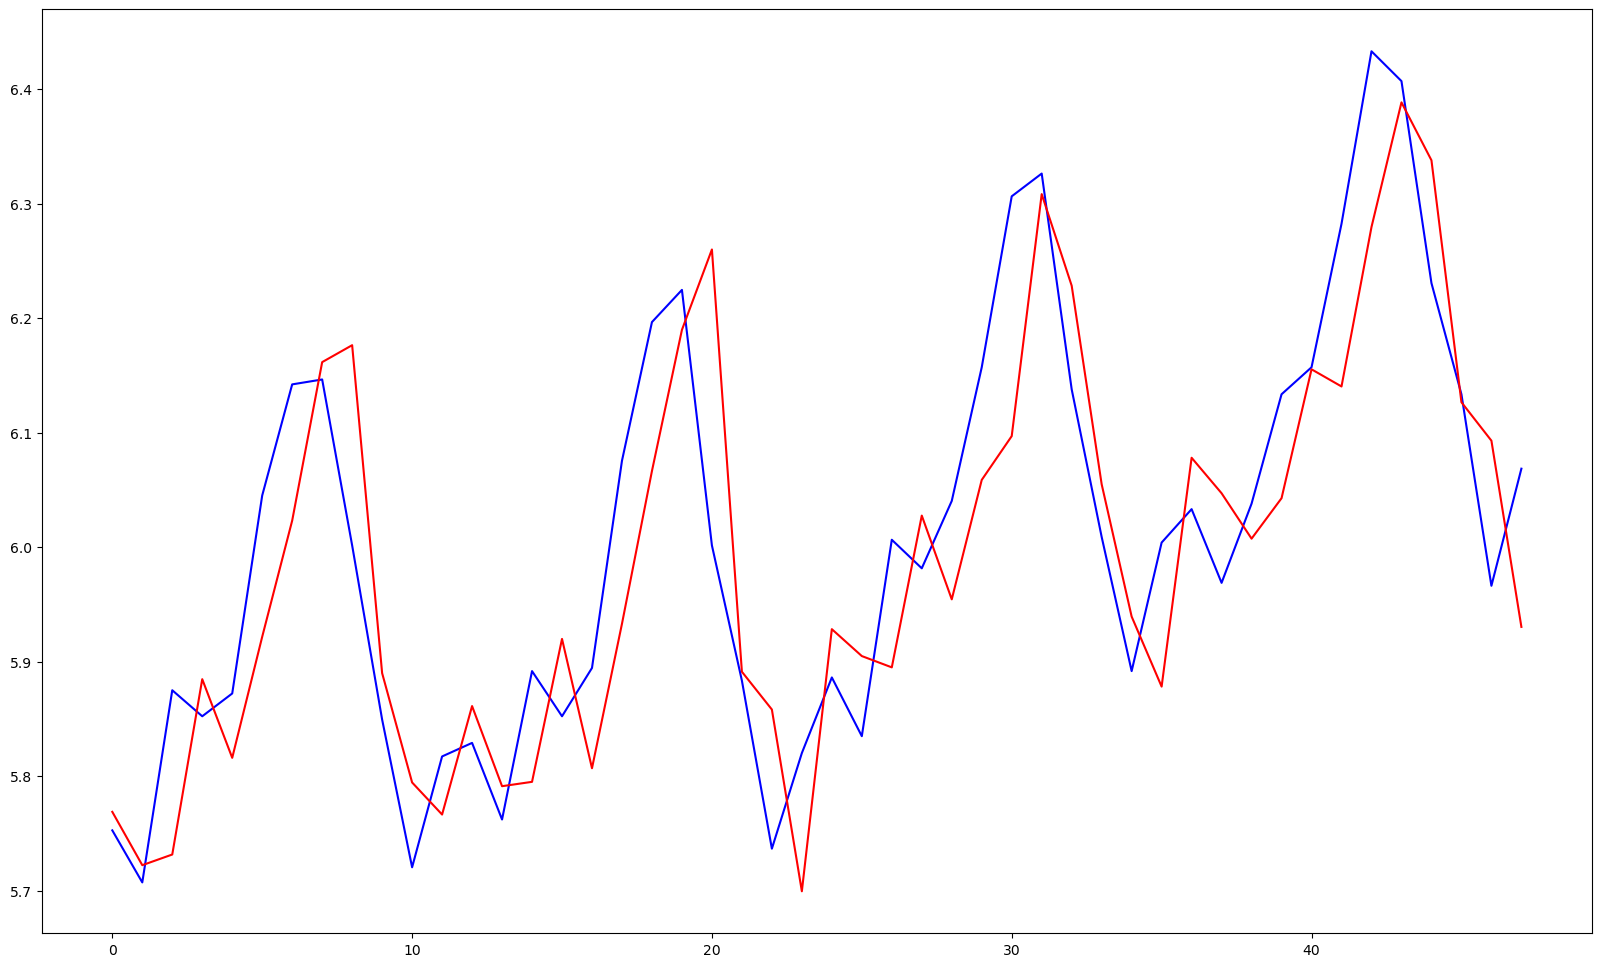

In [63]:

# plot
pyplot.plot(test, color = 'blue', label='test')   
pyplot.plot(predictions, color='red', label='pred')
pyplot.show()

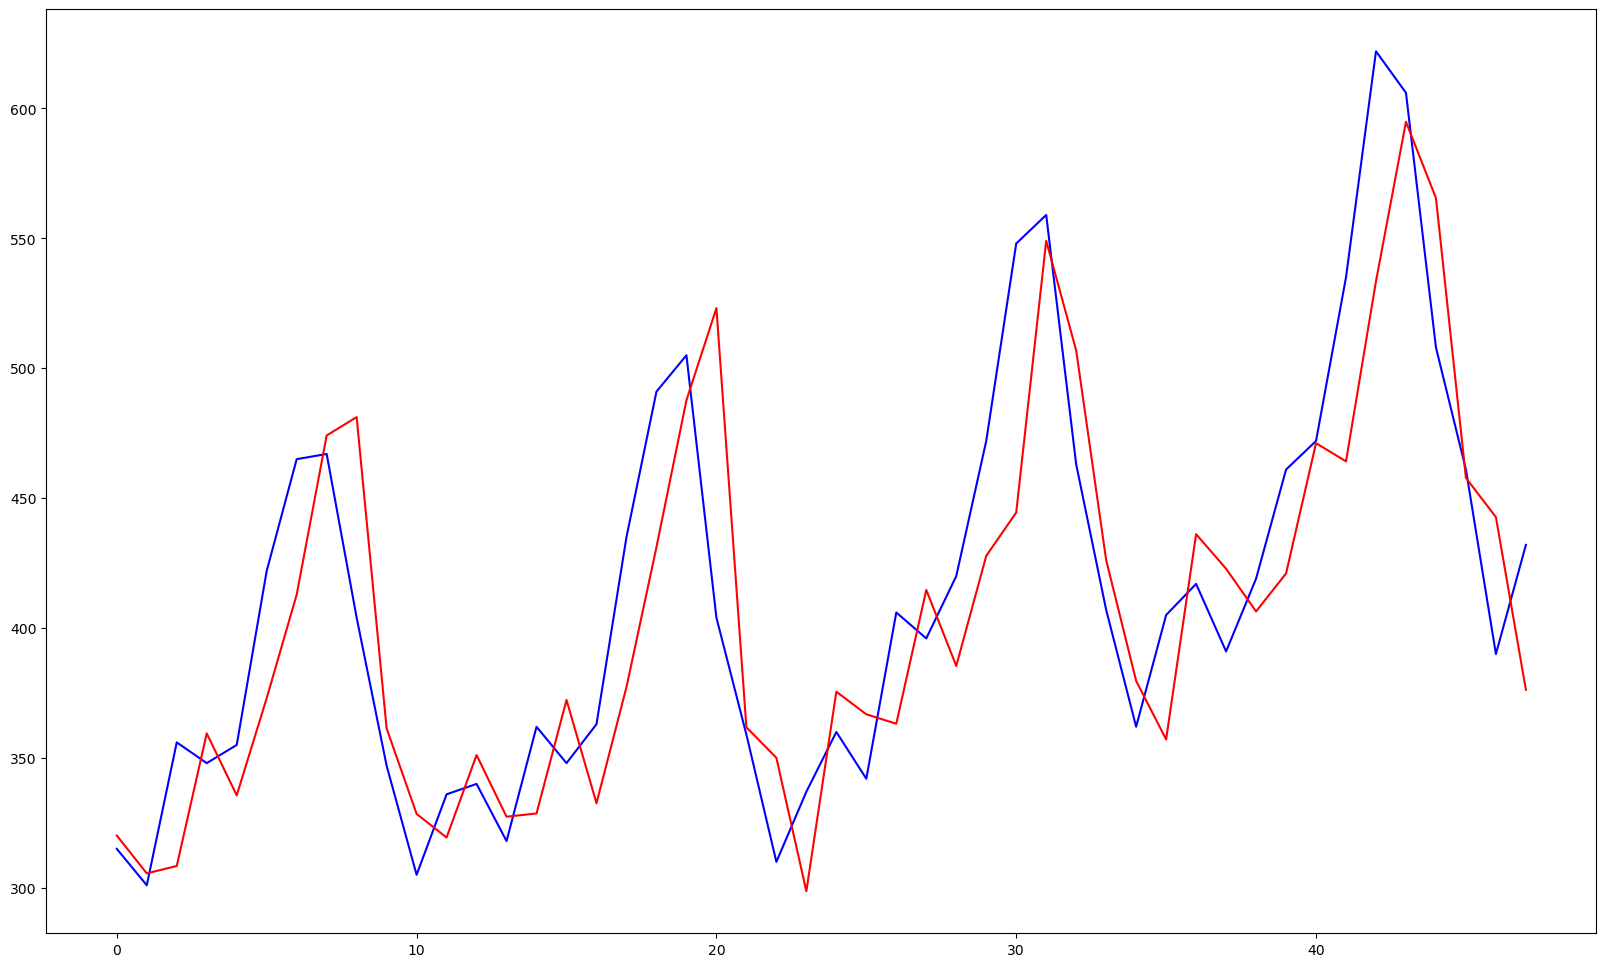

In [64]:
# plot
pyplot.plot(np.exp(test), color = 'blue', label='test')   
pyplot.plot(np.exp(predictions), color='red', label='pred')
pyplot.show()

In [65]:

from math import sqrt
rms = sqrt(mean_squared_error(np.exp(test), np.exp(predictions)))
print('Mean Squarred Error: %.2f'% rms)


Mean Squarred Error: 43.19


# AUTO ARIMA

In [69]:
from pmdarima.arima import auto_arima

In [70]:
arima_model = auto_arima(train, start_p=1, start_q=1, d=1, max_p=4, max_q=4, start_P=1, 
                         D=None, start_Q=1, max_P=4, max_D=1, max_Q=4, max_order=5, m=1, 
                         seasonal=True, stationary=False, information_criterion='aic', 
                         alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, 
                         n_jobs=1, start_params=None, trend=None, method='lbfgs', 
                         maxiter=50, offset_test_args=None, seasonal_test_args=None, 
                         suppress_warnings=True, error_action='trace', trace=False, 
                         random=False, random_state=None, n_fits=10, 
                         return_valid_fits=False, out_of_sample_size=0, 
                         scoring='mse', scoring_args=None, with_intercept='auto', 
                         sarimax_kwargs=None)

In [71]:

arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   96
Model:               SARIMAX(2, 1, 1)   Log Likelihood                  87.293
Date:                Thu, 11 Jul 2024   AIC                           -166.586
Time:                        22:49:49   BIC                           -156.371
Sample:                             0   HQIC                          -162.458
                                 - 96                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9172      0.127      7.244      0.000       0.669       1.165
ar.L2         -0.3428      0.143     -2.393      0.017      -0.624      -0.062
ma.L1         -0.8033      0.139     -5.774      0.000      -1.076      -0.531
sigma2         0.0093      0.002      5.230      0.000       0.006       0.013
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):                 5.66
Prob(Q):                              0.47   Prob(JB):                         0.06
Heteroskedasticity (H):               0.98   Skew:                             0.26
Prob(H) (two-sided):                  0.96   Kurtosis:                         1.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:

prediction_arima_model = pd.DataFrame(arima_model.predict(n_periods=len(test)))
prediction_arima_model.columns = ['predicted_sales']

In [73]:
np.exp(prediction_arima_model)

,predicted_sales
0,327.667442
1,334.659102
2,333.294460
3,329.653256
4,326.805921
5,325.439084
6,325.155890
7,325.363462
8,325.651130
9,325.843917


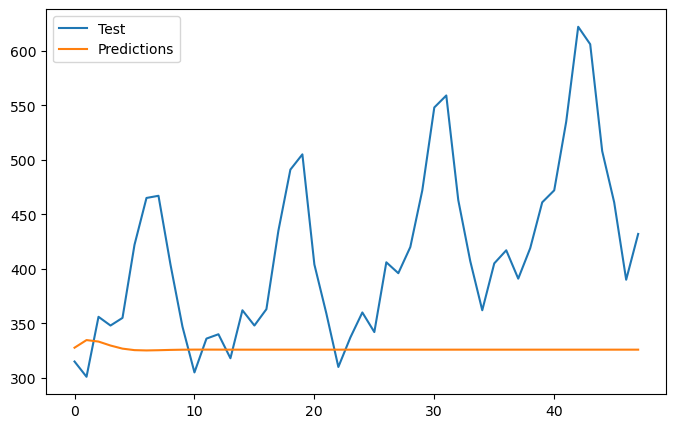

In [74]:
plt.figure(figsize=(8,5))
#plt.plot(train, label='Training')
plt.plot(np.exp(test), label='Test')
plt.plot(np.exp(prediction_arima_model), label='Predictions')
plt.legend(loc = 'upper left')
plt.show()

# Grid Search

########################################################################## ########################################################################## ####################DETERMINE PDQ VALUES - DONOT RUN################### ########################################################################## ##########################################################################

In [86]:
import warnings
import numpy as np
import pandas as pd
from pandas import read_csv
from datetime import datetime
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings("ignore")


In [88]:

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.8)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

In [89]:

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [90]:
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

In [91]:
import datetime
print(datetime.datetime.now())
p_values = [1,2,3,4,5]
d_values = [0,1]
q_values = [1,2,3]
warnings.filterwarnings("ignore")
evaluate_models(train, p_values, d_values, q_values)
print(datetime.datetime.now())

2024-07-11 23:03:33.842530
ARIMA(1, 0, 1) MSE=0.012
ARIMA(1, 0, 2) MSE=0.012
ARIMA(1, 0, 3) MSE=0.013
ARIMA(1, 1, 1) MSE=0.011
ARIMA(1, 1, 2) MSE=0.010
ARIMA(1, 1, 3) MSE=0.010
ARIMA(2, 0, 1) MSE=0.011
ARIMA(2, 0, 2) MSE=0.011
ARIMA(2, 0, 3) MSE=0.011
ARIMA(2, 1, 1) MSE=0.010
ARIMA(2, 1, 2) MSE=0.010
ARIMA(2, 1, 3) MSE=0.010
ARIMA(3, 0, 1) MSE=0.011
ARIMA(3, 0, 2) MSE=0.013
ARIMA(3, 0, 3) MSE=0.011
ARIMA(3, 1, 1) MSE=0.010
ARIMA(3, 1, 2) MSE=0.010
ARIMA(3, 1, 3) MSE=0.008
ARIMA(4, 0, 1) MSE=0.012
ARIMA(4, 0, 2) MSE=0.009
ARIMA(4, 0, 3) MSE=0.009
ARIMA(4, 1, 1) MSE=0.010
ARIMA(4, 1, 2) MSE=0.009
ARIMA(4, 1, 3) MSE=0.007
ARIMA(5, 0, 1) MSE=0.010
ARIMA(5, 0, 2) MSE=0.008
ARIMA(5, 0, 3) MSE=0.007
ARIMA(5, 1, 1) MSE=0.010
ARIMA(5, 1, 2) MSE=0.008
ARIMA(5, 1, 3) MSE=0.008
Best ARIMA(4, 1, 3) MSE=0.007
2024-07-11 23:07:30.539772
